A complete project

The [`imdb_smol.tar.gz`](data/imdb_smol.tar.gz) archive (also available [in the
repository](https://github.com/LoicGrobol/apprentissage-artificiel/blob/main/slides/06-scikit-learn/data/imdb_smol.tar.gz))
contains 602 movie reviews as text files, divided into two classes :
positive and negative (materialized by subfolders). Your mission is to create a
script that :

- Loads and vectors this data
- Trains and compares classifiers on this dataset

The objective is to determine which type of vectorization and model seems to be the most suitable and which
hyperparameters to choose. 

## Loading the neccessary libraries

In [2]:
import os
import nltk
import string
import re
import pandas as pd
import numpy as np
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tqdm.notebook import tqdm
tqdm.pandas()

# Set seed
np.random.seed(500)

# Package specific installs
nltk.download('stopwords')
nltk.download('punkt')

# CONSTANTS
LANG = 'english' # change for model to work on other languages (may still need to update nltk and spacy_sentence_bert)

[nltk_data] Downloading package stopwords to /home/asilq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/asilq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import os
import pandas as pd
from collections import defaultdict

#Reading the contents of files in the directories specified in the path list and storing the contents and their corresponding sentiments in a defaultdict called data
text = defaultdict(list)
path = ["/home/asilq/Documents/M2_TAL_NANTERRE/Part 1/Apprentissage_automatique/imdb_smol/neg", "/home/asilq/Documents/M2_TAL_NANTERRE/Part 1/Apprentissage_automatique/imdb_smol/pos"]


#The defaultdict has two keys, "Review" and "Sentiment", which store the contents of the files and their sentiments, respectively.

#For loop iterates over the paths in the path list
for i in path:
    for filename in os.listdir(i):
        with open(os.path.join(i, filename), 'r') as f:
            text["Review"].append(f.read())         #opens the file, reads its contents, and appends the contents to the "Review"
            if i == path[0]:
                text["Sentiment"].append("neg")     #appends the corresponding sentiment ("neg" or "pos") to the "Sentiment" key of the defaultdict.
            else:
                text["Sentiment"].append("pos")

data_set= pd.DataFrame(text)        #Creating a dataframe from the defaultdict
print(data_set)

                                                Review Sentiment
0    I could never stand watching Happy Days after ...       neg
1    1st watched 8/3/2003 - 2 out of 10(Dir-Brad Sy...       neg
2    This is the biggest insult to TMNT ever. Fortu...       neg
3    I have always admired Susan Sarandon for her i...       neg
4    There's not a drop of sunshine in "The Sunshin...       neg
..                                                 ...       ...
597  "Convicts" is very much a third act sort of fi...       pos
598  Don't listen to fuddy-duddy critics on this on...       pos
599  Sublimity is the way we have to reach for The ...       pos
600  <br /><br />One of the best films I've ever se...       pos
601  'Stanley and Iris' show the triumph of the hum...       pos

[602 rows x 2 columns]


In [6]:
#cleaning the data

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

data_set["Review"] = data_set["Review"].apply(clean_text)

print(data_set) 

                                                Review Sentiment
0    could never stand watching happy days chachi j...       neg
1    st watched dirbrad sykes mindless movie fleshe...       neg
2    biggest insult tmnt ever fortunantely official...       neg
3    always admired susan sarandon integrity honest...       neg
4    theres drop sunshine sunshine boys makes title...       neg
..                                                 ...       ...
597  convicts much third act sort film dialogue cha...       pos
598  dont listen fuddyduddy critics one gem young r...       pos
599  sublimity way reach beauty sublimity stuff fil...       pos
600  br br one best films ive ever seen robert duva...       pos
601  stanley iris show triumph human spirit stanley...       pos

[602 rows x 2 columns]


In [8]:
#dataframe shape : rows and columns
print(data_set.shape)

(602, 2)


In [10]:
#assigning the heads
X = data_set['Review']
y = data_set['Sentiment']

In [11]:
# using the train test split function to split the data
X_train, X_test, y_train, y_test = train_test_split(
  X, y , random_state=104,test_size=0.25, shuffle=True)

In [12]:
# visualising the split of the data
print('X_train : ')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
 
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
 
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
47     good thing movie shot goldie hawn standing lit...
81     saw dvd friends house thought turkish action m...
273    absolutely incredible anyone could make commen...
448    bogdonovichs mostly unheralded classic film un...
360    someone release movie dvd take hallowed place ...
Name: Review, dtype: object
(451,)

X_test : 
169    thats sound bees thats effect induced watching...
546    heres yet another piece evidence claim worship...
566    storyline max von sydows voiceover narration h...
547    busy phillips put one hell performance comedic...
381    todays world digital fabrication computer repl...
Name: Review, dtype: object
(151,)

y_train : 
47     neg
81     neg
273    neg
448    pos
360    pos
Name: Sentiment, dtype: object
(451,)

y_test : 
169    neg
546    pos
566    pos
547    pos
381    pos
Name: Sentiment, dtype: object
(151,)


In [13]:
# the cleaned dataframe 
train_df = pd.DataFrame(data={"x_train":X_train, "y_train":y_train})
test_df = pd.DataFrame(data={"x_test":X_test, "y_test":y_test})
print(train_df.head())
print(test_df.head())

                                               x_train y_train
47   good thing movie shot goldie hawn standing lit...     neg
81   saw dvd friends house thought turkish action m...     neg
273  absolutely incredible anyone could make commen...     neg
448  bogdonovichs mostly unheralded classic film un...     pos
360  someone release movie dvd take hallowed place ...     pos
                                                x_test y_test
169  thats sound bees thats effect induced watching...    neg
546  heres yet another piece evidence claim worship...    pos
566  storyline max von sydows voiceover narration h...    pos
547  busy phillips put one hell performance comedic...    pos
381  todays world digital fabrication computer repl...    pos


 ## Conducting some EDA

<AxesSubplot: >

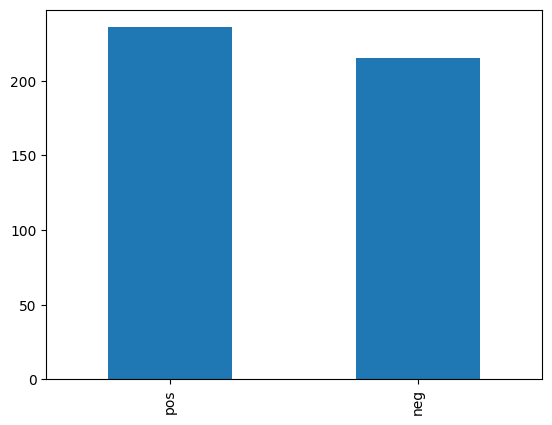

In [14]:
#pos and negs at the y_train data
train_df['y_train'].value_counts().plot.bar()

<AxesSubplot: >

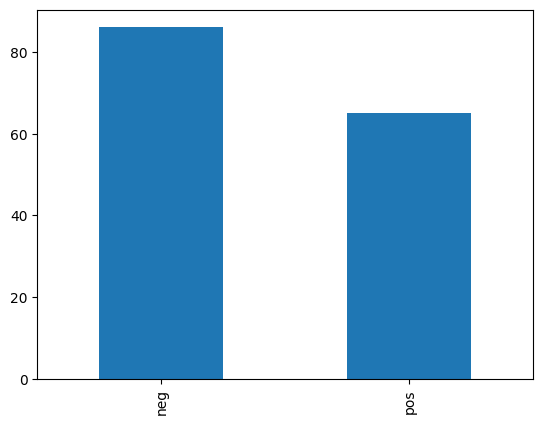

In [15]:
#pos and negs at the y_test data
test_df['y_test'].value_counts().plot.bar()

In [16]:
# shuffle the DataFrame rows
train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
# Drop Na
train_df = train_df.dropna()
test_df = test_df.dropna()

# Tokenize via vectorization
train_df["x_train_tokens"] = train_df["x_train"].apply(word_tokenize)
test_df["x_test_tokens"] =   test_df["x_test"].apply(word_tokenize)

# Remove stop words
def remove_stop_words(tokens):
  for token in tokens:
      if token in stopwords.words(LANG):
          tokens.remove(token)
  return tokens
train_df["x_train_cleaned"] = train_df["x_train_tokens"].progress_apply(remove_stop_words)
test_df["x_test_cleaned"] = test_df["x_test_tokens"].progress_apply(remove_stop_words)

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

## Let's inspect our cleaned dataset and vectorize using a transformer.

In [17]:
#visualising the train dataframe
train_df.head()

,x_train,y_train,x_train_tokens,x_train_cleaned
281,burt kennedy used good director youd never kno...,neg,"[burt, kennedy, used, good, director, youd, ne...","[burt, kennedy, used, good, director, youd, ne..."
272,original book set wont tv series people watch ...,neg,"[original, book, set, wont, tv, series, people...","[original, book, set, wont, tv, series, people..."
593,hickory dickory dock good poirot mystery confe...,pos,"[hickory, dickory, dock, good, poirot, mystery...","[hickory, dickory, dock, good, poirot, mystery..."
404,scott bartletts offon nine minutes pure crazin...,pos,"[scott, bartletts, offon, nine, minutes, pure,...","[scott, bartletts, offon, nine, minutes, pure,..."
11,robert taylor definitely showed fine dramatic ...,neg,"[robert, taylor, definitely, showed, fine, dra...","[robert, taylor, definitely, showed, fine, dra..."


In [18]:
#visualising the test dataframe
test_df.head()

,x_test,y_test,x_test_tokens,x_test_cleaned
309,wisecracker biography actor william haines off...,pos,"[wisecracker, biography, actor, william, haine...","[wisecracker, biography, actor, william, haine..."
578,actually find video game scary disturbing know...,pos,"[actually, find, video, game, scary, disturbin...","[actually, find, video, game, scary, disturbin..."
454,sunday july pm castro san franciscobr br south...,pos,"[sunday, july, pm, castro, san, franciscobr, b...","[sunday, july, pm, castro, san, franciscobr, b..."
123,times finishing film one wishes refund time sp...,neg,"[times, finishing, film, one, wishes, refund, ...","[times, finishing, film, one, wishes, refund, ..."
10,movie unrelentingly bad could hardly believe w...,neg,"[movie, unrelentingly, bad, could, hardly, bel...","[movie, unrelentingly, bad, could, hardly, bel..."


## Vectorizing with transformer

In [19]:
#installing bert
!pip install spacy_sentence_bert

Defaulting to user installation because normal site-packages is not writeable


In [20]:
# loading one of the models listed at https://github.com/MartinoMensio/spacy-sentence-bert/
import spacy_sentence_bert
nlp = spacy_sentence_bert.load_model('en_stsb_distilbert_base')

In [21]:
# converting list of strings to strings, to allow for vectorization
def list_to_string(s):
    # initialize an empty string
    str1 = " "
    # return string 
    return (str1.join(s))
train_df["x_train_final"] = train_df["x_train_cleaned"].apply(list_to_string)
test_df["x_test_final"] = test_df["x_test_cleaned"].apply(list_to_string)

In [22]:
#vectorization
def vectorize(string):
  return nlp(string).vector
train_df["x_train_vector"] = train_df["x_train_final"].progress_apply(vectorize)
test_df["x_test_vector"] = test_df["x_test_final"].progress_apply(vectorize)

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

In [23]:
# dataframe cleaned + the vectorized column 
print(type(train_df["x_train_final"][0]))
print(train_df["x_train_final"][0])
train_df.head()

<class 'str'>
could never stand watching happy days chachi joined cast knew trouble best scene movie featured scott baio skateboard chase scene jodie foster first grownup role turns usual professional performance excuse boring mess two hours life ill never get back noteworthy characters unbelievable storyline questionable editing horrendous cinematography worst couldnt cared less story california teens kids live miserable lives parents idiots dont waste time watching ugly excuse movie


,x_train,y_train,x_train_tokens,x_train_cleaned,x_train_final,x_train_vector
281,burt kennedy used good director youd never kno...,neg,"[burt, kennedy, used, good, director, youd, ne...","[burt, kennedy, used, good, director, youd, ne...",burt kennedy used good director youd never kno...,"[0.15240386, 0.7326652, 0.44287255, 0.38291657..."
272,original book set wont tv series people watch ...,neg,"[original, book, set, wont, tv, series, people...","[original, book, set, wont, tv, series, people...",original book set wont tv series people watch ...,"[0.7885823, 0.020227723, 0.15656038, 0.0843183..."
593,hickory dickory dock good poirot mystery confe...,pos,"[hickory, dickory, dock, good, poirot, mystery...","[hickory, dickory, dock, good, poirot, mystery...",hickory dickory dock good poirot mystery confe...,"[-0.43618038, -0.026268344, 1.2634858, 0.07773..."
404,scott bartletts offon nine minutes pure crazin...,pos,"[scott, bartletts, offon, nine, minutes, pure,...","[scott, bartletts, offon, nine, minutes, pure,...",scott bartletts offon nine minutes pure crazin...,"[-0.062393595, 0.7170986, 0.7451215, -0.708620..."
11,robert taylor definitely showed fine dramatic ...,neg,"[robert, taylor, definitely, showed, fine, dra...","[robert, taylor, definitely, showed, fine, dra...",robert taylor definitely showed fine dramatic ...,"[0.15152526, 0.4524694, 0.6718438, -0.30145133..."


## Training the dataset and applying the classifiers

In [29]:
# Support Vector Machine (SVM) Classifer
clf = SVC(gamma='auto', verbose=True) 
clf.fit(train_df["x_train_vector"].to_list(),train_df["y_train"].to_list())
y_pred = clf.predict(test_df["x_test_vector"].to_list())
print(f'Our accuracy is: {np.round(accuracy_score(test_df["y_test"].to_list(), y_pred)*100, decimals=4)}%')

[LibSVM]*
optimization finished, #iter = 269
obj = -271.291272, rho = 0.374601
nSV = 350, nBSV = 311
Total nSV = 350
Our accuracy is: 80.7947%


In [30]:
# RandomForest
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(train_df["x_train_vector"].to_list(),train_df["y_train"].to_list())
y_pred = clf.predict(test_df["x_test_vector"].to_list())
print(f'Our accuracy is: {np.round(accuracy_score(test_df["y_test"].to_list(), y_pred)*100, decimals=4)}%')

Our accuracy is: 79.4702%


In [31]:
# LogisticRegression
clf = LogisticRegression(max_iter=5000)
clf.fit(train_df["x_train_vector"].to_list(),train_df["y_train"].to_list())
y_pred = clf.predict(test_df["x_test_vector"].to_list())
print(f'Our accuracy is: {np.round(accuracy_score(test_df["y_test"].to_list(), y_pred)*100, decimals=4)}%')

Our accuracy is: 78.1457%


In [32]:
# Naive Bayes
clf = GaussianNB()
clf.fit(train_df["x_train_vector"].to_list(),train_df["y_train"].to_list())
y_pred = clf.predict(test_df["x_test_vector"].to_list())
print(f'Our accuracy is: {np.round(accuracy_score(test_df["y_test"].to_list(), y_pred)*100, decimals=4)}%')

Our accuracy is: 80.1325%


In [33]:
# Decision Tree  
clf = DecisionTreeClassifier()
clf.fit(train_df["x_train_vector"].to_list(),train_df["y_train"].to_list())
y_pred = clf.predict(test_df["x_test_vector"].to_list())
print(f'Our accuracy is: {np.round(accuracy_score(test_df["y_test"].to_list(), y_pred)*100, decimals=4)}%')

Our accuracy is: 68.8742%


## Results

    We can tell that the best results were attained whe using the SVM classifier for we got 80.7947%, followed closely by the Naïve Bayes model at 80.1325%. 

    The classifier that scored the lowesr was Decision Tree, it could be because of the following reasons:

    Overfitting: This occurs when the model is too complex and is able to fit the noise in the training data. This can cause the model to perform poorly on new, unseen data.

    Underfitting: This occurs when the model is too simple and is not able to capture the underlying pattern in the data. This can also cause the model to perform poorly on new, unseen data.

    Lack of enough data: Decision tree classifiers require a sufficient amount of data to make accurate predictions. If the dataset is too small, it may not be possible for the model to learn the underlying patterns in the data.

    Hyperparameters are not optimised: Different decision tree algorithm have different parameter to set such as depth, max leaf node, min sample leaf. These parameters can have a great impact on the final model performance. So, it is important to optimize these parameters.

    To improve the performance of the decision tree classifier, we can try several techniques such as cross-validation, regularization, and feature selection. 

# Further work

Further work can be accomplished to improve the model such as changing the encoder for the Naïve Bayes model (which I've tried using from sklearn.preprocessing import OneHotEncoder, but failed), using better state-of-the-art transformers and larger GPUs.